# Data Exploration 
#### Due Wednesday, December 1st, 2021
#### By Aaliyah Hänni, Vanessa Joy Hsu, Liem Luong, Dwight Sablan

This section of your proposal (and therefore the document you should submit for this) should summarize an exploration of the data.  You will want to explore the data through visualizations and inspection, looking for:

* feature set defined by name (or identifier if sensitive), variable type, range, etc. - may want statistical plots
* missing values 
* outliers
* correlated features
* likely sources of bias
* other data flaws (is the set too small?  are you missing a feature?)
 
You will also want to discuss the specific features that you are extracting for your project (and justify those features), as well as any data cleaning or augmentation processes you are using.


Data Source: *Clothing Pattern Dataset* by Alexander J. Medeiros, Lee Stearns, Leah Findlater, Chuan Chen, and Jon E. Froehlich 
https://github.com/lstearns86/clothing-pattern-dataset

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import urllib
from PIL import Image

import requests
from io import BytesIO

import glob, os, cv2

In [3]:
clothingDataset = pd.read_csv('googleClothingDataset.csv')

In [4]:
clothingDataset.head(5)

,Class Name,URL,Original Width,Original Height,Crop X,Crop Y,Crop Width,Crop Height,Scales
0,solid,https://www.publicdomainpictures.net/pictures/...,1920,1280,0,0,1920,1280,0.2474874;0.4949747;0.9899495;1.979899
1,solid,https://c1.staticflickr.com/9/8208/8185035876_...,5456,3064,0,0,5456,3064,0.103389;0.206778;0.4135559;0.8271118;1.654224
2,solid,https://cdn.pixabay.com/photo/2017/08/14/22/24...,3680,2760,0,0,3680,2760,0.1147768;0.2295535;0.459107;0.918214;1.836428
3,solid,https://upload.wikimedia.org/wikipedia/commons...,2816,2112,0,0,2816,2112,0.1499923;0.2999847;0.5999694;1.199939
4,solid,https://c1.staticflickr.com/9/8753/17091052376...,2500,1668,0,0,2500,1668,0.1899184;0.3798367;0.7596735;1.519347


In [5]:
clothingDataset.describe

<bound method NDFrame.describe of      Class Name                                                URL  \
0         solid  https://www.publicdomainpictures.net/pictures/...   
1         solid  https://c1.staticflickr.com/9/8208/8185035876_...   
2         solid  https://cdn.pixabay.com/photo/2017/08/14/22/24...   
3         solid  https://upload.wikimedia.org/wikipedia/commons...   
4         solid  https://c1.staticflickr.com/9/8753/17091052376...   
...         ...                                                ...   
2744    zig zag  https://previews.123rf.com/images/sn333g/sn333...   
2745    zig zag  http://www.sheetworld.com/p_images/sxb3242_W11...   
2746    zig zag  https://www.adamrossfabrics.co.uk/wp-content/u...   
2747    zig zag  https://secure.img2-ag.wfcdn.com/im/41114327/r...   
2748    zig zag  https://thumbs.dreamstime.com/z/green-brown-zi...   

      Original Width  Original Height  Crop X  Crop Y  Crop Width  \
0               1920             1280       0       0   

In [6]:
clothingDataset.dtypes

Class Name         object
URL                object
Original Width      int64
Original Height     int64
Crop X              int64
Crop Y              int64
Crop Width          int64
Crop Height         int64
Scales             object
dtype: object

In [8]:
#display mean sizes
clothingDataset.iloc[:, 2:].mean()

Original Width     926.920698
Original Height    829.368134
Crop X              32.262641
Crop Y              28.966897
Crop Width         859.845035
Crop Height        768.420880
dtype: float64

In [9]:
#display standard deviation of sizes
clothingDataset.iloc[:, 2:].std()

Original Width     833.759767
Original Height    694.660113
Crop X             175.485733
Crop Y             147.425093
Crop Width         769.309842
Crop Height        648.219260
dtype: float64

In [10]:
#minimums
clothingDataset.iloc[:, 2:].min()

Original Width                                                   225
Original Height                                                  225
Crop X                                                             0
Crop Y                                                             0
Crop Width                                                       117
Crop Height                                                      103
Scales             0.05525621;0.1105124;0.2210248;0.4420497;0.884...
dtype: object

In [11]:
#maximums
clothingDataset.iloc[:, 2:].max()

Original Width         6016
Original Height        6088
Crop X                 3150
Crop Y                 3430
Crop Width             6016
Crop Height            6000
Scales             3.075571
dtype: object

In [ ]:
clothingDataset.isnull().sum()

## Extract Images from URL

### Solids

In [76]:
dataset = clothingDataset.iloc[:, :2].values.tolist()

In [94]:
#note this method was not fast enough - it was adding the entire image to the dataframe, which was causing it to timeout

#nbsphinx_timeout = 60 #increase timeout time

#images = [] #df used to store valid images. Format: pattern, image
#badURLs = [] #df used to store invalid images/broken urls. Format: patter, url

#for counter, row in enumerate(dataset):
 #   try:
        #append images to a dataframe
        #r = requests.get(row[1])
        #images.append([row[0], Image.open(BytesIO(r.content))])

  #  except Exception:
   #     badURLs.append([row[0], row[1]])
    #    continue

KeyboardInterrupt: 

In [114]:
images = [] #df used to store valid images. Format: pattern, image
badURLs = [] #df used to store invalid images/broken urls. Format: patter, url

dir_base = os.getcwd() + '/patterns' # Get your current directory & create a new folder 'called patterns'

for i, row in enumerate(dataset): 
    #row[0] = pattern, row[1] = url
    try:
        image_name = '0{}_{}'.format(i+1, "_" + str(row[0]) + '.jpg') # Example: 01_floral.jpg
        urllib.request.urlretrieve(row[1], image_name)
        path = os.path.join(dir_base , image_name)
        images.append([row[0], path])  # adding that locally fetched image path to pandas column

    except Exception:
        badURLs.append([row[0], row[1]])
        continue

In [115]:
#format the images into a dataframe
images = pd.DataFrame(images, columns = ['pattern', 'image'])
badURLs = pd.DataFrame(badURLs, columns = ['pattern', 'url'])

In [116]:
print("Valid Image URLs:   ", len(images))
print("Invalid Image URLs: ", len(badURLs))

Valid Image URLs:    1254
Invalid Image URLs:  1495


In [117]:
print("INVALID IMAGE URLS")
print('')
print("     Solid: ", len(badURLs[badURLs.pattern == 'solid']))
print("     Checkered: ", len(badURLs[badURLs.pattern == 'checkered']))
print("     Floral: ", len(badURLs[badURLs.pattern == 'floral']))
print("     Dotted: ", len(badURLs[badURLs.pattern == 'dotted']))
print("     Striped: ", len(badURLs[badURLs.pattern == 'striped']))
print("     Zig Zag: ", len(badURLs[badURLs.pattern == 'zig zag']))
print('')
print("     Total: ", len(badURLs))

INVALID IMAGE URLS

     Solid:  230
     Checkered:  257
     Floral:  322
     Dotted:  133
     Striped:  341
     Zig Zag:  212

     Total:  1495


In [118]:
print("VALID IMAGE URLS")
print('')
print("     Solid: ", len(images[images.pattern == 'solid']))
print("     Checkered: ", len(images[images.pattern == 'checkered']))
print("     Floral: ", len(images[images.pattern == 'floral']))
print("     Dotted: ", len(images[images.pattern == 'dotted']))
print("     Striped: ", len(images[images.pattern == 'striped']))
print("     Zig Zag: ", len(images[images.pattern == 'zig zag']))
print('')
print("     Total: ", len(images))

VALID IMAGE URLS

     Solid:  189
     Checkered:  235
     Floral:  260
     Dotted:  182
     Striped:  193
     Zig Zag:  195

     Total:  1254


In [141]:
patterns = ['checkered', 'dotted', 'floral', 'solid', 'striped', 'zig zag']
badURL_totals = []
for i in patterns:
    badURL_totals.append([i, len(badURLs[badURLs.pattern == i])])
                          
goodURL_totals = []
for i in patterns:
    goodURL_totals.append([i, len(images[images.pattern == i])])

In [144]:
badURL_totals = pd.DataFrame(badURL_totals, columns = ['pattern', 'total'])
goodURL_totals = pd.DataFrame(goodURL_totals, columns = ['pattern', 'total'])

In [148]:
badURL_totals.total.to_list()

[257, 133, 322, 230, 341, 212]

Text(0, 0.5, 'Image Count')

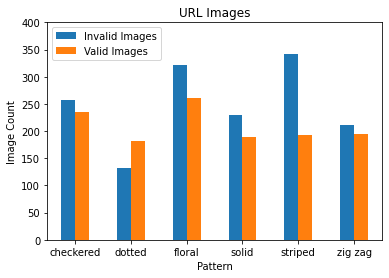

In [171]:
index = patterns
df = pd.DataFrame({'Invalid Images': badURL_totals.total.to_list(),
                   'Valid Images': goodURL_totals.total.to_list()}, index=index)

ax = df.plot.bar(rot=0)
ax.set_ylim([0, 400])

plt.title('URL Images')

plt.xlabel('Pattern')
plt.ylabel('Image Count')

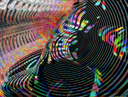

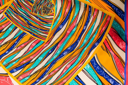

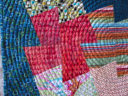

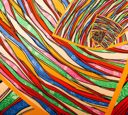

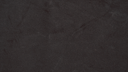

In [71]:
#display images
size = 128, 128 #reshape to thumbnail size
for i in range(5):
    images.image[i].thumbnail(size)
    display(images.image[i])

## Explore FingerCamera Dataset
FingerCamera

\checkered

\dotted

\floral

\solid

\striped

\zig zag

In [152]:
path = 'FingerCamera/'
images = []
patterns = ['checkered', 'dotted', 'floral', 'solid', 'striped', 'zig zag']
pattern_counts = []
for i in patterns:
    images.extend(glob.glob(path + str(i) + '/*.png'))
    pattern_counts.append(len(images))
    print(i, len(images))

checkered 88
dotted 136
floral 224
solid 272
striped 336
zig zag 400


Text(0, 0.5, 'Image Count')

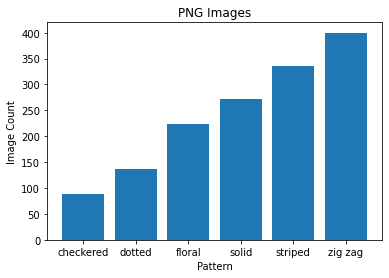

In [172]:
plt.bar(patterns, pattern_counts)
plt.title("PNG Images")
ax.set_ylim([0, 400])
plt.xlabel('Pattern')
plt.ylabel('Image Count')

Text(0, 0.5, 'Image Count')

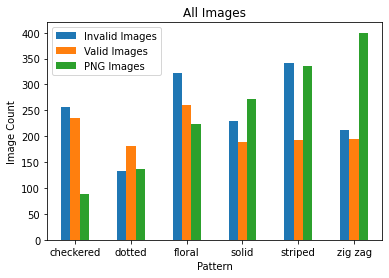

In [173]:
index = patterns
df = pd.DataFrame({'Invalid Images': badURL_totals.total.to_list(),
                   'Valid Images': goodURL_totals.total.to_list(),
                  'PNG Images': pattern_counts}, index=index)

ax = df.plot.bar(rot=0)

plt.title('All Images')
plt.xlabel('Pattern')
plt.ylabel('Image Count')

In [168]:
total_valid = []
for i in range(6):
    total_valid.append(goodURL_totals.total.to_list()[i] + pattern_counts[i])

Text(0, 0.5, 'Image Count')

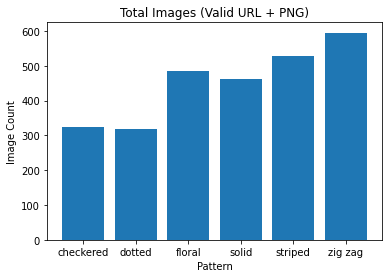

In [174]:
plt.bar(patterns, total_valid)

plt.title('Total Images (Valid URL + PNG)')
plt.xlabel('Pattern')
plt.ylabel('Image Count')

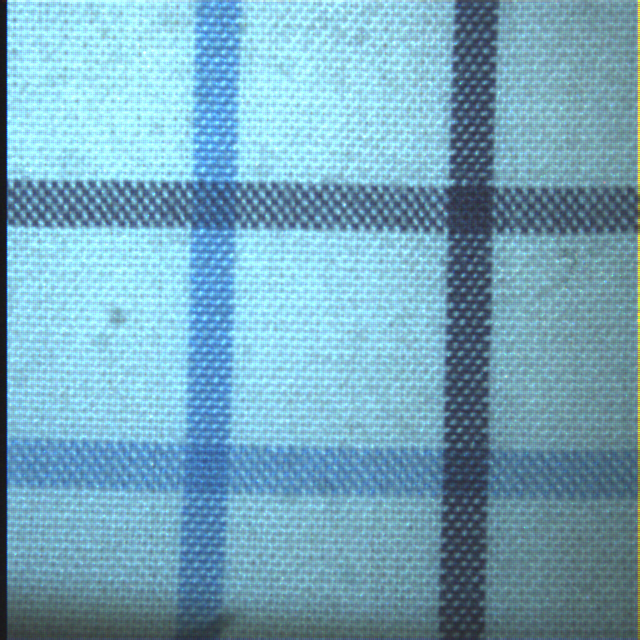

In [54]:
size = 128, 128 #reshape to thumbnail size
for i in [0, 100, 150, 200, 250, 300, 350]:
    pattern.image[i].thumbnail(size)
    display(pattern.image[i])

## Cited Sources
* https://github.com/lstearns86/clothing-pattern-dataset 

* https://www.kite.com/python/answers/how-to-read-an-image-data-from-a-url-in-python
* https://pillow.readthedocs.io/en/stable/reference/Image.html


* https://datascience.stackexchange.com/questions/58351/how-to-retrieve-images-from-a-url-in-a-pandas-dataframe-and-store-them-as-pil-ob

* https://stackoverflow.com/questions/46107348/how-to-display-image-stored-in-pandas-dataframe

*https://www.codegrepper.com/code-examples/python/python+load+all+images+from+folder

* https://www.py4u.net/discuss/151260